# Tutorial 4: Dense Grid Remapping - Cube2Shell

In [1]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
import magpie

In [2]:
# Initialise magpie Cub2Shell class
c2s = magpie.dg.Cube2Shell()

# Setup the cube grid
c2s.setup_cube(0., 2., 20, 0., 2., 20, 0., 2., 20)

# We are going to just assign each point an ascending integer value.
f = np.zeros(np.shape(c2s.x3d))
rr = np.sqrt((c2s.x3d - 1.)**2. + (c2s.y3d - 1.)**2. + (c2s.z3d - 1.)**2.)
f = np.exp(-0.5*(rr/1.)**2.)

In [4]:
# Construct spherical polar coordinate shells
nside = 64
c2s.setup_polar(0., 2., 5, nside, center=[0., 0., 0.], rebin_shell=2, rebin_r=2, 
                periodicx=[0, 1], periodicy=[0, 1], periodicz=[0, 1])

In [5]:
# Now, let's remap the function from a linear cartesian grid to spherical polar coordinates
f_sphere = c2s.remap(f)

Remapping : |##################################################| 100% 
Downgrading to desired spherical polar coordinate grid...
Done!


/Users/krishna/opt/miniconda2/envs/py3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/krishna/opt/miniconda2/envs/py3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/krishna/opt/miniconda2/envs/py3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In

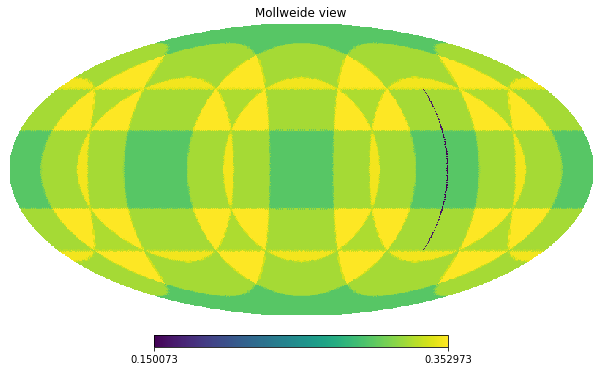

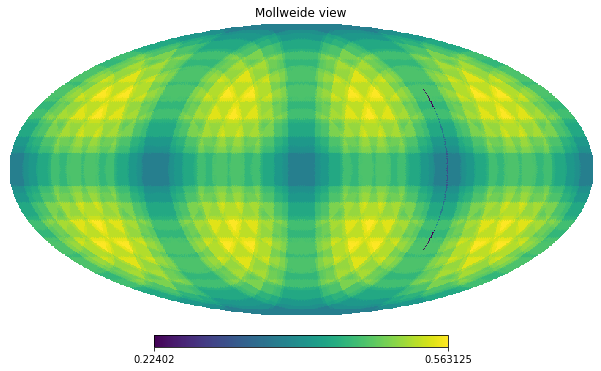

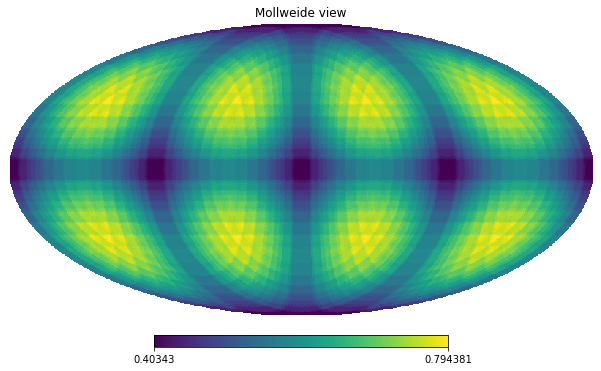

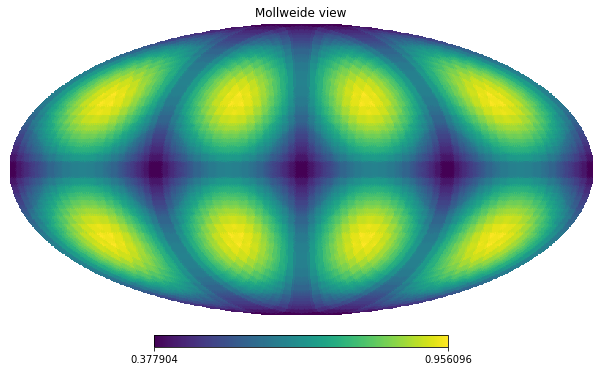

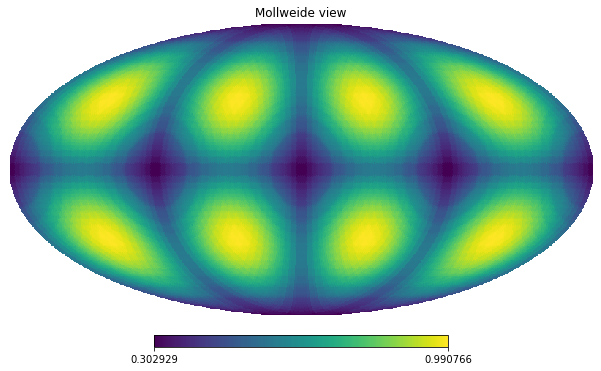

In [6]:
for i in range(0, len(f_sphere)):
    hp.mollview(f_sphere[i])